In [2]:
##import data
from keras.datasets import mnist
import numpy as np
(train_images,_),(test_images,_)=mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


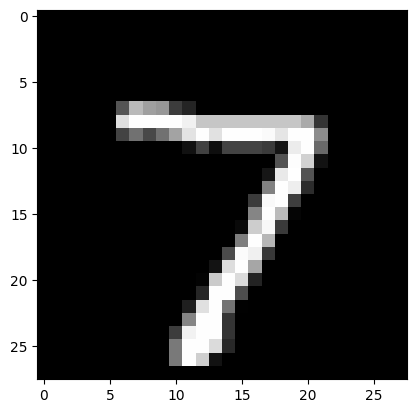

In [3]:
##show an example of the images
import matplotlib.pyplot as plt
plt.imshow(test_images[0])
plt.gray()

In [4]:
##normalize all data set
train_images = train_images.astype('float32')/255.
test_images = test_images.astype('float32')/255.

In [5]:
###reshape
train_images = train_images.reshape(len(train_images),
                                    np.prod(train_images.shape[1:]))
test_images = test_images.reshape(len(test_images),
                                  np.prod(test_images.shape[1:]))

In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [7]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
#the input layer with 784 features
input_layer = Input(shape=(784,))
#the hidden or encoded layer with 32 dimensions
encoder_layer1 = Dense(encoding_dim, activation='relu')(input_layer)
#the decoded layer with 784 features
decoder_layer1 = Dense(784, activation='sigmoid')(encoder_layer1)

# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoder_layer1)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [8]:
####testing to make the two seperately
encoder = Model(input_layer,encoder_layer1)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [9]:
#### Compile autoencoder
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [10]:
epochs = 60
batch_size = 256

autoencoder.fit(train_images,train_images,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(test_images,test_images))

Epoch 1/60
235/235 [==============================] - 2s 5ms/step - loss: 0.2768 - val_loss: 0.1909
Epoch 2/60
235/235 [==============================] - 1s 4ms/step - loss: 0.1714 - val_loss: 0.1530
Epoch 3/60
235/235 [==============================] - 1s 4ms/step - loss: 0.1436 - val_loss: 0.1331
Epoch 4/60
235/235 [==============================] - 1s 4ms/step - loss: 0.1281 - val_loss: 0.1212
Epoch 5/60
235/235 [==============================] - 1s 4ms/step - loss: 0.1185 - val_loss: 0.1132
Epoch 6/60
235/235 [==============================] - 1s 4ms/step - loss: 0.1117 - val_loss: 0.1074
Epoch 7/60
235/235 [==============================] - 1s 4ms/step - loss: 0.1068 - val_loss: 0.1034
Epoch 8/60
235/235 [==============================] - 1s 5ms/step - loss: 0.1031 - val_loss: 0.1002
Epoch 9/60
235/235 [==============================] - 1s 4ms/step - loss: 0.1004 - val_loss: 0.0978
Epoch 10/60
235/235 [==============================] - 1s 4ms/step - loss: 0.0983 - val_loss: 0.0961

In [11]:
encoded_imgs = encoder.predict(test_images)
print(encoded_imgs.shape)

313/313 [==============================] - 0s 905us/step
(10000, 32)


In [12]:
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 784)


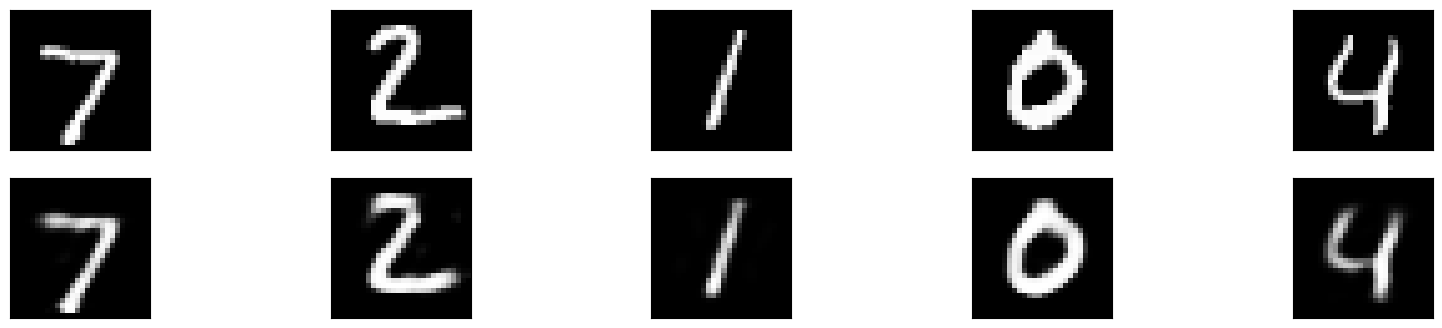

In [13]:
######plot the first 5
import matplotlib.pyplot as plt

n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #original images
    ax = plt.subplot(2,n,i+1)
    plt.imshow(test_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #reconstructed images
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
autoencoder.predict(test_images,)

313/313 [==============================] - 1s 2ms/step


array([[2.72682970e-11, 1.94203889e-11, 6.46115800e-11, ...,
        3.59438659e-11, 1.82045756e-09, 7.03358899e-11],
       [1.07608566e-11, 4.14218789e-12, 1.36633174e-12, ...,
        2.35900470e-12, 4.47552802e-12, 5.81213409e-13],
       [2.17208989e-08, 2.05524255e-08, 5.61755513e-08, ...,
        5.43773666e-08, 5.05765385e-08, 9.62756719e-09],
       ...,
       [9.28645631e-16, 6.41651556e-15, 1.06664928e-14, ...,
        1.03075598e-15, 4.28022147e-14, 2.89421396e-15],
       [9.27526082e-14, 1.18201727e-12, 6.81961269e-13, ...,
        9.69022063e-13, 2.25135557e-12, 1.74344561e-13],
       [1.20324915e-20, 6.39760679e-20, 7.53184550e-19, ...,
        1.82045691e-21, 5.13699484e-20, 1.70290255e-21]], dtype=float32)

partie 8:

en suivant les consignes de la question, nous allons:

Parcourir chaque combinaison d'optimiseur et de fonction de perte.
Réinitialiser et compiler l'autoencodeur avec chaque combinaison.
Entraîner le modèle sur les données d'entraînement.
Prédire sur les données de test et calculer l'erreur quadratique moyenne (MSE).
Stocker et trier les résultats en fonction de la MSE.

In [15]:
from keras.metrics import mean_squared_error
import numpy as np

# Définition des combinaisons d'optimiseurs et de fonctions de perte
combinations = [
    ('adam', 'binary_crossentropy'),
    ('sgd', 'binary_crossentropy'),
    ('adam', 'mean_squared_error'),
    ('sgd', 'mean_squared_error')
]

# Espace pour stocker les résultats
results = []

for optimizer, loss_function in combinations:
    # Réinitialiser le modèle avec la même architecture
    autoencoder = Model(input_layer, decoder_layer1)
    
    # Compiler le modèle avec le nouvel optimiseur et la nouvelle fonction de perte
    autoencoder.compile(optimizer=optimizer, loss=loss_function)

    # Entraîner le modèle
    autoencoder.fit(train_images, train_images,
                    epochs=50,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(test_images, test_images))

    # Prédire sur les données de test
    decoded_images = autoencoder.predict(test_images)

    # Calculer la MSE (erreur quadratique moyenne)
    mse = np.mean(mean_squared_error(test_images, decoded_images))

    # Stocker les résultats
    results.append((f'Optimiseur: {optimizer}, Perte: {loss_function}', mse))

# Trier les résultats par mse
results.sort(key=lambda x: x[1])

# Afficher les résultats
for combination, mse in results:
    print(f'{combination} - MSE: {mse}')


Epoch 1/50
235/235 [==============================] - 3s 6ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0913
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0915
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0913
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0914

La meilleure performance est obtenue avec l'optimiseur SGD et la fonction de perte `mean_squared_error`, indiquant une légère supériorité dans la reconstruction des images. Les optimiseurs Adam et SGD montrent des performances comparables, soulignant leur efficacité. La fonction de perte `mean_squared_error` s'avère légèrement plus performante, probablement car elle est directement liée à la minimisation de l'erreur de reconstruction, ce qui est crucial pour les autoencodeurs. Les différences minimes entre les combinaisons suggèrent que le modèle d'autoencodeur est relativement robuste aux variations de ces paramètres pour le dataset MNIST. La simplicité de la base de données exploité justifie la proximité des résultats. 

On va maintenant entraîner l'autoencodeur avec différentes combinaisons d'époques et de taille de lot, puis calculer et afficher la MSE pour chaque combinaison. Vous pourrez ainsi identifier la combinaison optimale.

In [17]:
combinations = [
    (10, 100),  # 10 epochs, 128 batch_size
    (10, 500),  # 10 epochs, 256 batch_size
    (50, 100),  # 50 epochs, 128 batch_size
    (50, 500)   # 50 epochs, 256 batch_size
]

results = []

for epochs, batch_size in combinations:
    # Reinitialiser et compiler l'autoencodeur
    autoencoder.compile(optimizer='sgd', loss='mean_squared_error')

    # Entraîner le modèle avec les nouvelles valeurs
    autoencoder.fit(train_images, train_images,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_images, test_images))

    # Calculer la MSE sur les données de test
    decoded_images = autoencoder.predict(test_images)
    mse = np.mean(mean_squared_error(test_images, decoded_images))

    # Ajouter les résultats
    results.append(((epochs, batch_size), mse))

# Afficher les résultats sous forme de tableau
print("Epochs, Batch Size - MSE")
for comb, mse in results:
    print(f"{comb} - {mse}")


Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 10/10
313/313 [==============================] - 0s 1ms/step
Epoch 1/10
120/120 [=============

Les résultats montrent des MSE très similaires pour toutes les combinaisons d'époques et de tailles de lot, indiquant une influence minime de ces paramètres sur la performance de l'autoencodeur dans ce cas. Cependant, la combinaison (50 époques, 500 en taille de lot) donne la MSE la plus faible, suggérant une amélioration marginale en augmentant à la fois le nombre d'époques et la taille de lot. Cela peut indiquer que l'autoencodeur bénéficie d'un entraînement plus long et de lots plus importants pour affiner légèrement ses performances. Néanmoins, étant donné la faible différence entre les combinaisons, le choix spécifique d'époques et de taille de lot semble avoir un impact limité dans ce contexte.

Pour obtenir des résultats plus significatifs, on pourrait essayer :

1. **Elargir la Gamme des Paramètres** : Tester des époques et des tailles de lot plus variées.
2. **Optimisation Hyperparamétrique** : Utiliser des techniques comme Grid Search ou Random Search.
3. **Modifier l'Architecture du Modèle** : Expérimenter avec différentes architectures de l'autoencodeur.
4. **Utiliser un Dataset Plus Complex** : Essayer avec des ensembles de données plus exigeants que MNIST.
5. **Analyser d'Autres Métriques** : Considérer d'autres mesures de performance en plus de la MSE.

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 dense_13 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
120/120 [==============================] - 2s 11ms/step - loss: 0.3387 - val_loss: 0.2297
Epoch 2/50
120/120 [==============================] - 1s 10ms/step - loss: 0.2031 - val_loss: 0.1830
Epoch 3/50
120/120 [==============================] - 1s 9ms/step - loss: 0.1737 - val_loss: 0.1626
Epoch 4/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1561 - val_loss: 0.1475
Epoch 5/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1432 - val_loss: 0.1365
Epoch 6/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1337 - val_loss: 0.1283
Epoch 7/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1264 - val_loss: 0.1218
Epoch 8/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1206 - val_loss: 0.1165
Epoch 9/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1157 - val_loss: 0.1121
Epoch 10/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1117 - val_los

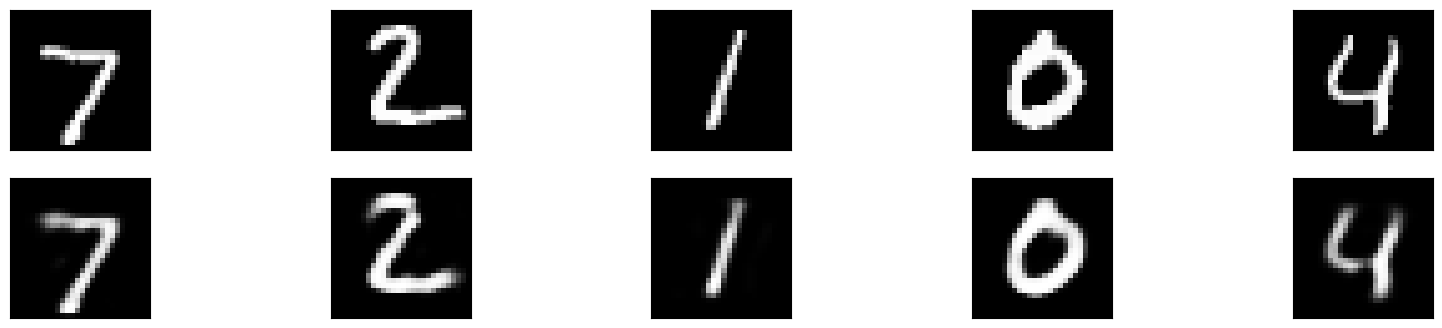

In [20]:
encoding_dim = 32
#the input layer with 784 features
input_layer = Input(shape=(784,))
#the hidden or encoded layer with 32 dimensions
encoder_layer1 = Dense(encoding_dim, activation='relu')(input_layer)
#the decoded layer with 784 features
decoder_layer1 = Dense(784, activation='sigmoid')(encoder_layer1)

# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoder_layer1)
autoencoder.summary()
####testing to make the two seperately
encoder = Model(input_layer,encoder_layer1)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))

#### Compile autoencoder
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')


# Entraînement de l'autoencodeur avec les paramètres optimaux
autoencoder.fit(train_images, train_images, epochs=50, batch_size=500, shuffle=True, validation_data=(test_images, test_images))

# Prédiction et visualisation des images
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)

# Affichage des images originales et reconstruites
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # Images originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Images reconstruites
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Les résultats semblent sensibelemnt mieux (comme le 4 ou le 1) mais dans l'ensemble ils étaient déjà bons. le set est surement trop simple pour qu'on voit la difference. 
Voici les anciens pour la comparaison:

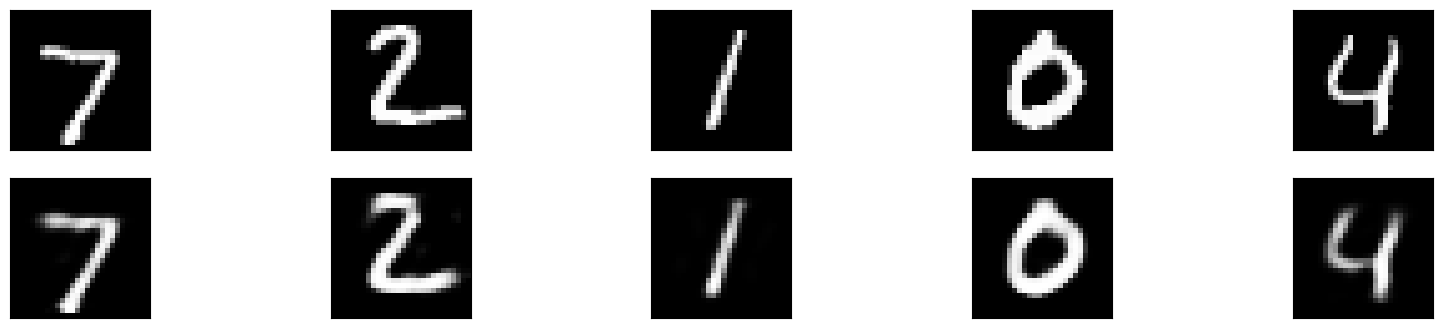